In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets
from sklearn import metrics



In [2]:
pricing_med = pd.read_csv('transcsv.csv')
pricing_med

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COST,DISPENSES_COST,TOTALCOST
0,1993-10-23T00:06:09Z,1993-11-18T00:06:09Z,07487886-8188-dbbe-ccd4-82b23718a085,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,bb347741-669d-6bc5-f782-e2487e2c0f0a,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,316.82,0.00,1,316.82
1,1995-09-14T02:06:09Z,1995-09-21T02:06:09Z,07487886-8188-dbbe-ccd4-82b23718a085,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,9cf7c206-3a71-f161-2d6d-8526e97b26fd,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,144.74,0.00,1,144.74
2,1997-02-28T22:06:09Z,1997-03-14T22:06:09Z,07487886-8188-dbbe-ccd4-82b23718a085,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,b3256125-f84e-1c2a-4c60-0cf3767c3bf3,313820,Acetaminophen 160 MG Chewable Tablet,51.59,0.00,1,51.59
3,2014-01-31T22:06:09Z,2014-07-09T22:06:09Z,65c70d04-b6e4-31ed-091d-3515d95c148f,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,83ac5e28-7195-c94e-e3fa-3cb54ef02f71,856987,Acetaminophen 300 MG / Hydrocodone Bitartrate ...,18828.50,17154.50,3,56485.50
4,2014-03-31T12:06:09Z,2014-07-09T22:06:09Z,65c70d04-b6e4-31ed-091d-3515d95c148f,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,9981babd-2d24-c7ff-ad91-afba374f2b32,245134,72 HR Fentanyl 0.025 MG/HR Transdermal System,129.94,99.94,3,389.82
5,2014-05-30T12:06:09Z,2014-07-09T22:06:09Z,65c70d04-b6e4-31ed-091d-3515d95c148f,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,5107cfe9-6d45-21b3-f528-4f09d970ae26,1860491,12 HR Hydrocodone Bitartrate 10 MG Extended Re...,129.94,99.94,3,389.82
6,2014-07-09T22:06:09Z,2015-07-15T22:06:09Z,65c70d04-b6e4-31ed-091d-3515d95c148f,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,9538c9f1-1434-fc5b-88c4-09e9feae63df,245134,72 HR Fentanyl 0.025 MG/HR Transdermal System,129.94,99.94,3,389.82
7,2014-07-09T22:06:09Z,2015-07-15T22:06:09Z,65c70d04-b6e4-31ed-091d-3515d95c148f,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,9538c9f1-1434-fc5b-88c4-09e9feae63df,1860491,12 HR Hydrocodone Bitartrate 10 MG Extended Re...,129.94,99.94,3,389.82
8,2014-07-09T22:06:09Z,2015-07-15T22:06:09Z,65c70d04-b6e4-31ed-091d-3515d95c148f,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,9538c9f1-1434-fc5b-88c4-09e9feae63df,856987,Acetaminophen 300 MG / Hydrocodone Bitartrate ...,4114.84,4084.84,3,12344.52
9,2015-07-15T22:06:09Z,2016-07-20T22:06:09Z,65c70d04-b6e4-31ed-091d-3515d95c148f,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,f9e313f4-2831-114f-14b4-e2cafdb17cb1,245134,72 HR Fentanyl 0.025 MG/HR Transdermal System,129.94,0.00,3,389.82


In [3]:
pd.read_csv('transcsv.csv',index_col ='START')


,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COST,DISPENSES_COST,TOTALCOST
START,,,,,,,,,,
1993-10-23T00:06:09Z,1993-11-18T00:06:09Z,07487886-8188-dbbe-ccd4-82b23718a085,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,bb347741-669d-6bc5-f782-e2487e2c0f0a,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,316.82,0.00,1,316.82
1995-09-14T02:06:09Z,1995-09-21T02:06:09Z,07487886-8188-dbbe-ccd4-82b23718a085,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,9cf7c206-3a71-f161-2d6d-8526e97b26fd,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,144.74,0.00,1,144.74
1997-02-28T22:06:09Z,1997-03-14T22:06:09Z,07487886-8188-dbbe-ccd4-82b23718a085,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,b3256125-f84e-1c2a-4c60-0cf3767c3bf3,313820,Acetaminophen 160 MG Chewable Tablet,51.59,0.00,1,51.59
2014-01-31T22:06:09Z,2014-07-09T22:06:09Z,65c70d04-b6e4-31ed-091d-3515d95c148f,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,83ac5e28-7195-c94e-e3fa-3cb54ef02f71,856987,Acetaminophen 300 MG / Hydrocodone Bitartrate ...,18828.50,17154.50,3,56485.50
2014-03-31T12:06:09Z,2014-07-09T22:06:09Z,65c70d04-b6e4-31ed-091d-3515d95c148f,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,9981babd-2d24-c7ff-ad91-afba374f2b32,245134,72 HR Fentanyl 0.025 MG/HR Transdermal System,129.94,99.94,3,389.82
2014-05-30T12:06:09Z,2014-07-09T22:06:09Z,65c70d04-b6e4-31ed-091d-3515d95c148f,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,5107cfe9-6d45-21b3-f528-4f09d970ae26,1860491,12 HR Hydrocodone Bitartrate 10 MG Extended Re...,129.94,99.94,3,389.82
2014-07-09T22:06:09Z,2015-07-15T22:06:09Z,65c70d04-b6e4-31ed-091d-3515d95c148f,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,9538c9f1-1434-fc5b-88c4-09e9feae63df,245134,72 HR Fentanyl 0.025 MG/HR Transdermal System,129.94,99.94,3,389.82
2014-07-09T22:06:09Z,2015-07-15T22:06:09Z,65c70d04-b6e4-31ed-091d-3515d95c148f,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,9538c9f1-1434-fc5b-88c4-09e9feae63df,1860491,12 HR Hydrocodone Bitartrate 10 MG Extended Re...,129.94,99.94,3,389.82
2014-07-09T22:06:09Z,2015-07-15T22:06:09Z,65c70d04-b6e4-31ed-091d-3515d95c148f,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,9538c9f1-1434-fc5b-88c4-09e9feae63df,856987,Acetaminophen 300 MG / Hydrocodone Bitartrate ...,4114.84,4084.84,3,12344.52


In [4]:
pricing_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   START           29 non-null     object 
 1   STOP            27 non-null     object 
 2   PATIENT         29 non-null     object 
 3   PAYER           29 non-null     object 
 4   ENCOUNTER       29 non-null     object 
 5   CODE            29 non-null     int64  
 6   DESCRIPTION     29 non-null     object 
 7   BASE_COST       29 non-null     float64
 8   PAYER_COST      29 non-null     float64
 9   DISPENSES_COST  29 non-null     int64  
 10  TOTALCOST       29 non-null     float64
dtypes: float64(3), int64(2), object(6)
memory usage: 2.6+ KB


In [5]:
pricing_med.describe()

,CODE,BASE_COST,PAYER_COST,DISPENSES_COST,TOTALCOST
count,2.900000e+01,29.000000,29.000000,29.000000,29.000000
mean,9.340586e+05,2985.190345,2724.556897,2.896552,13330.755862
std,7.174242e+05,7203.184651,6911.322397,1.205488,40844.205143
min,2.451340e+05,51.590000,0.000000,1.000000,51.590000
25%,2.451340e+05,129.940000,0.000000,3.000000,389.820000
50%,8.569870e+05,129.940000,0.000000,3.000000,389.820000
75%,1.860491e+06,144.740000,99.940000,3.000000,389.820000
max,1.860491e+06,25749.080000,25719.080000,8.000000,205992.640000


In [6]:
%matplotlib inline


array([[<AxesSubplot: title={'center': 'CODE'}>,
        <AxesSubplot: title={'center': 'BASE_COST'}>],
       [<AxesSubplot: title={'center': 'PAYER_COST'}>,
        <AxesSubplot: title={'center': 'DISPENSES_COST'}>],
       [<AxesSubplot: title={'center': 'TOTALCOST'}>, <AxesSubplot: >]],
      dtype=object)

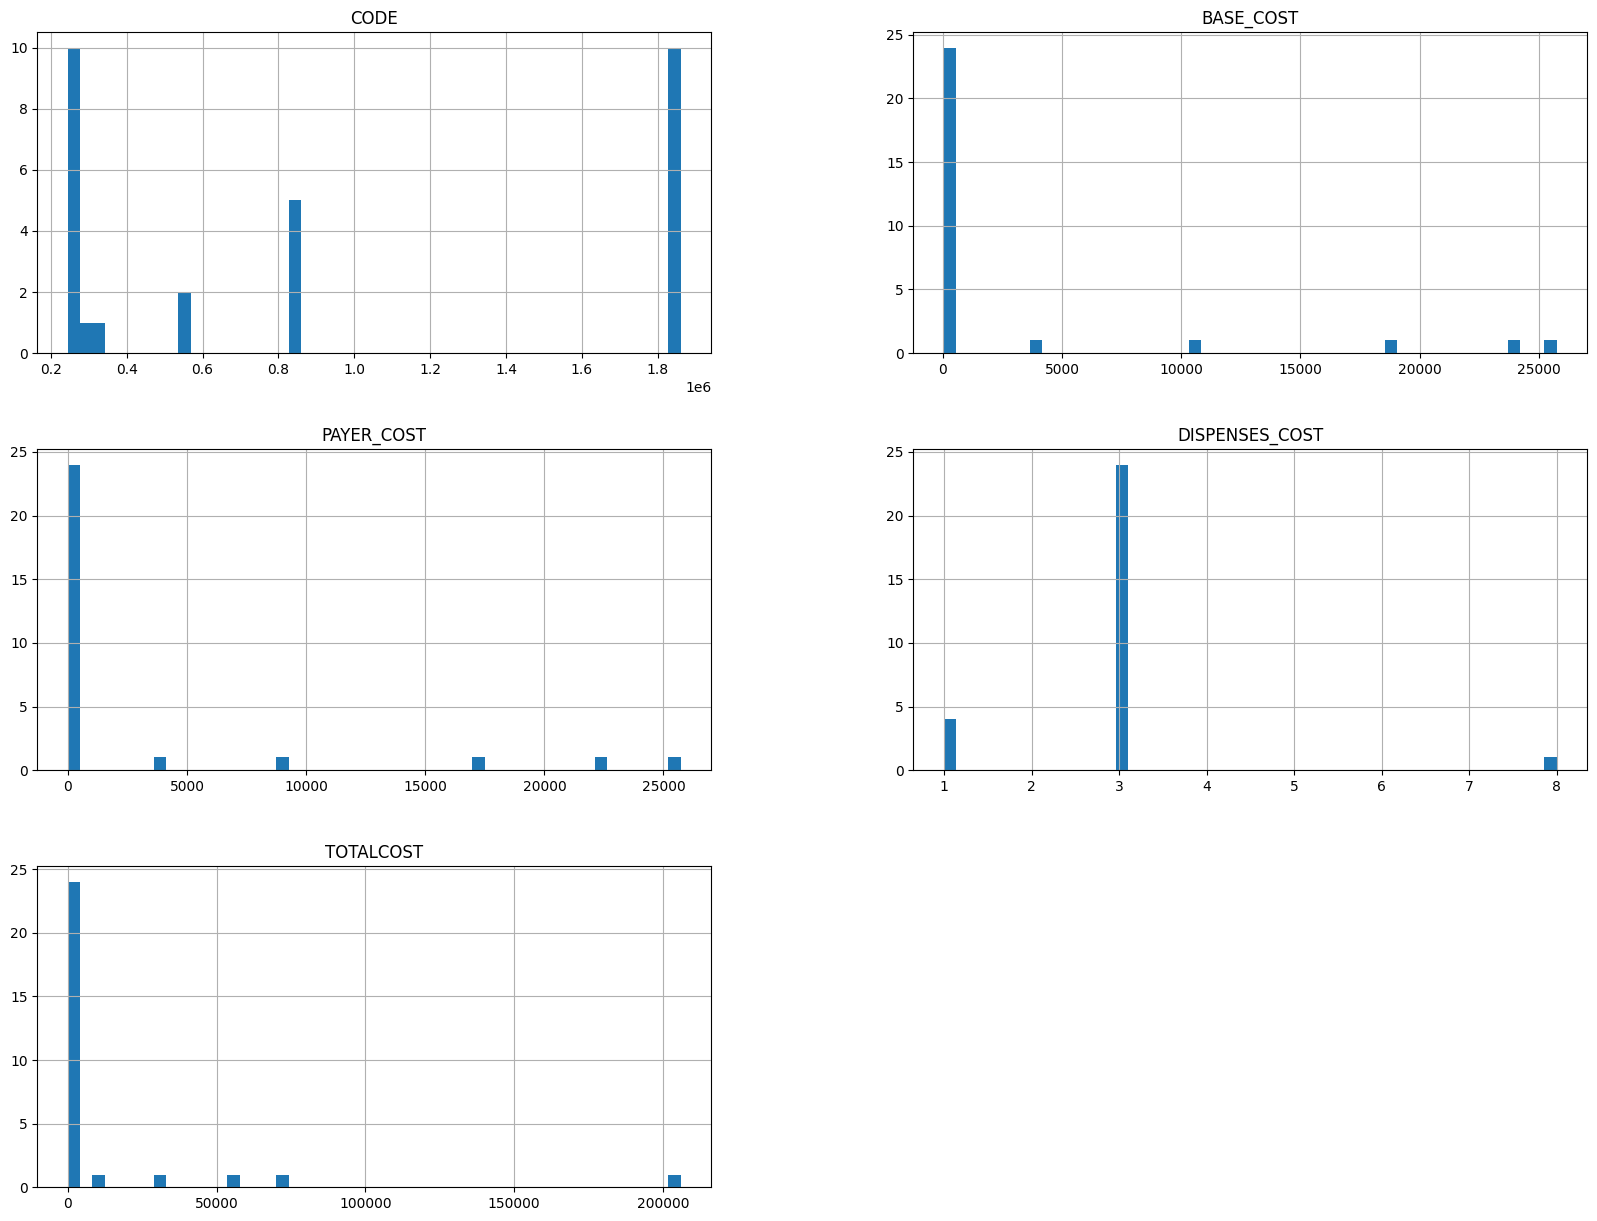

In [7]:
import matplotlib.pyplot as plt
pricing_med.hist(bins =50, figsize=(20,15))


In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(pricing_med, test_size =0.2,random_state=2)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:23
Rows in test set:6



array([[<AxesSubplot: xlabel='BASE_COST', ylabel='BASE_COST'>,
        <AxesSubplot: xlabel='DISPENSES_COST', ylabel='BASE_COST'>,
        <AxesSubplot: xlabel='PAYER_COST', ylabel='BASE_COST'>,
        <AxesSubplot: xlabel='TOTALCOST', ylabel='BASE_COST'>],
       [<AxesSubplot: xlabel='BASE_COST', ylabel='DISPENSES_COST'>,
        <AxesSubplot: xlabel='DISPENSES_COST', ylabel='DISPENSES_COST'>,
        <AxesSubplot: xlabel='PAYER_COST', ylabel='DISPENSES_COST'>,
        <AxesSubplot: xlabel='TOTALCOST', ylabel='DISPENSES_COST'>],
       [<AxesSubplot: xlabel='BASE_COST', ylabel='PAYER_COST'>,
        <AxesSubplot: xlabel='DISPENSES_COST', ylabel='PAYER_COST'>,
        <AxesSubplot: xlabel='PAYER_COST', ylabel='PAYER_COST'>,
        <AxesSubplot: xlabel='TOTALCOST', ylabel='PAYER_COST'>],
       [<AxesSubplot: xlabel='BASE_COST', ylabel='TOTALCOST'>,
        <AxesSubplot: xlabel='DISPENSES_COST', ylabel='TOTALCOST'>,
        <AxesSubplot: xlabel='PAYER_COST', ylabel='TOTALCOST'>,
    

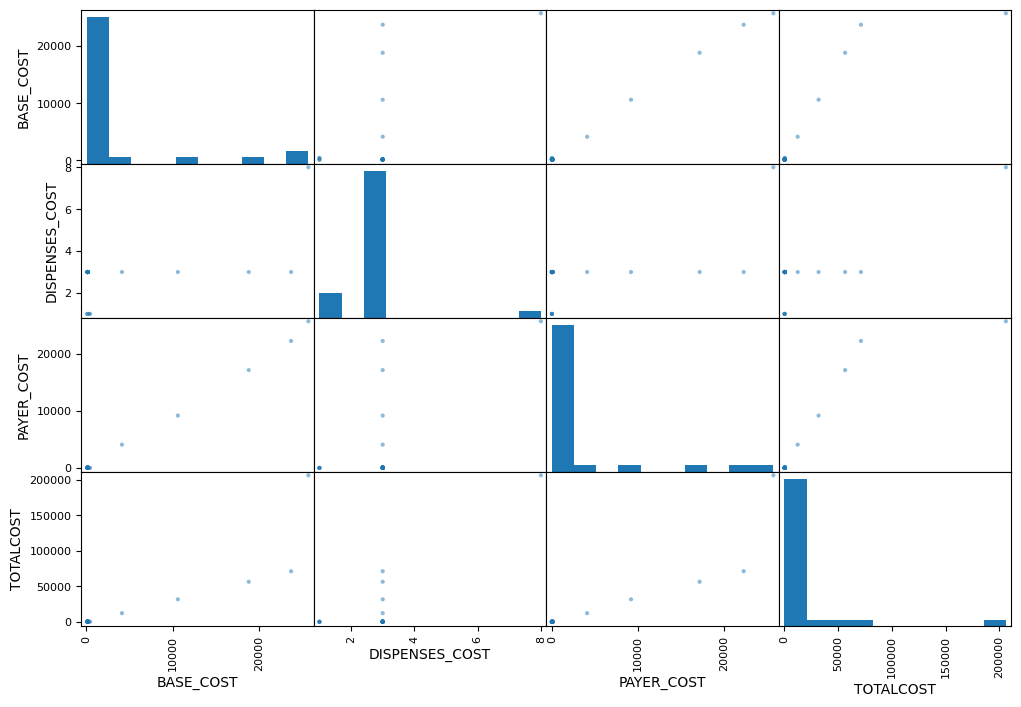

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["BASE_COST","DISPENSES_COST","PAYER_COST","TOTALCOST"]
scatter_matrix(pricing_med[attributes] ,figsize =(12,8))

<AxesSubplot: xlabel='BASE_COST', ylabel='TOTALCOST'>

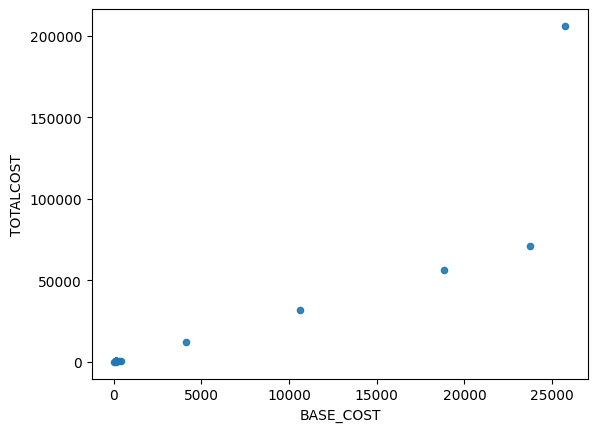

In [10]:
pricing_med.plot(kind="scatter",x ="BASE_COST",y ="TOTALCOST", alpha=0.9)